In [70]:
from collections import Counter
import os
import pandas as pd
from gensim.models import Phrases, phrases
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
from collections import Counter

def getTexts(folder):
    texts = {}
    for file in os.listdir(folder):
        if 'NOTES' not in file: 
                name = file.split('.')[0]
                path = os.path.join(folder,file)
                f = open(path,'r')
                data = f.readlines()
                if len(data) != 0: 
                    texts[name] = data[0]
                    f.close()
    return texts

def getgrams(txt):
    infile = open(txt,'r')
    lines = infile.readlines()
    infile.close()
    allgrams = []
    for line in lines: 
        line = line.split(':')
        ngrams = line[1].strip()
        if '_' in ngrams: 
                ngrams = ngrams.strip().split(' ')
                for n in ngrams:
                        allgrams.append(n)
        else: continue
    return allgrams 

def wordcloud(counts,title,mask,colormap):
    word_cloud = WordCloud(background_color = "white", width=3000, height=2000, max_words=200, mask = mask, colormap=colormap, collocations=False).generate_from_frequencies(counts)
    plt.figure(figsize=(50,10),facecolor="k")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title,fontsize=20)
    plt.imshow(word_cloud)
    plt.show()

In [63]:
''' 
Mask creation code from this tutorial: https://www.holisticseo.digital/python-seo/word-cloud/
'''
import numpy as np 
from PIL import Image
mask = np.array(Image.open('heart.png'))
def transform_zeros(val):
    if val == 0:return 255
    else: return val
maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

[('our_profit', 15), ('what_profit', 15), ('our_charity', 15), ('charity_is', 14), ('their_profit', 14), ('his_profit', 13), ('christian_charity', 13), ('no_profit', 12), ('poor_soul', 12), ('poor_man', 11), ('his_poor', 11), ('profit_is', 11), ('any_profit', 11), ('profit_and_pleasure', 11), ('profit_and_pleasures', 10), ('profit_but', 10), ('his_charity', 10), ('more_profit', 10), ('not_profit', 10), ('profit_or_pleasure', 10), ('charity_but', 10), ('more_charitable', 9), ('profit_that', 9), ('be_poor', 9), ('one_poor', 9)]


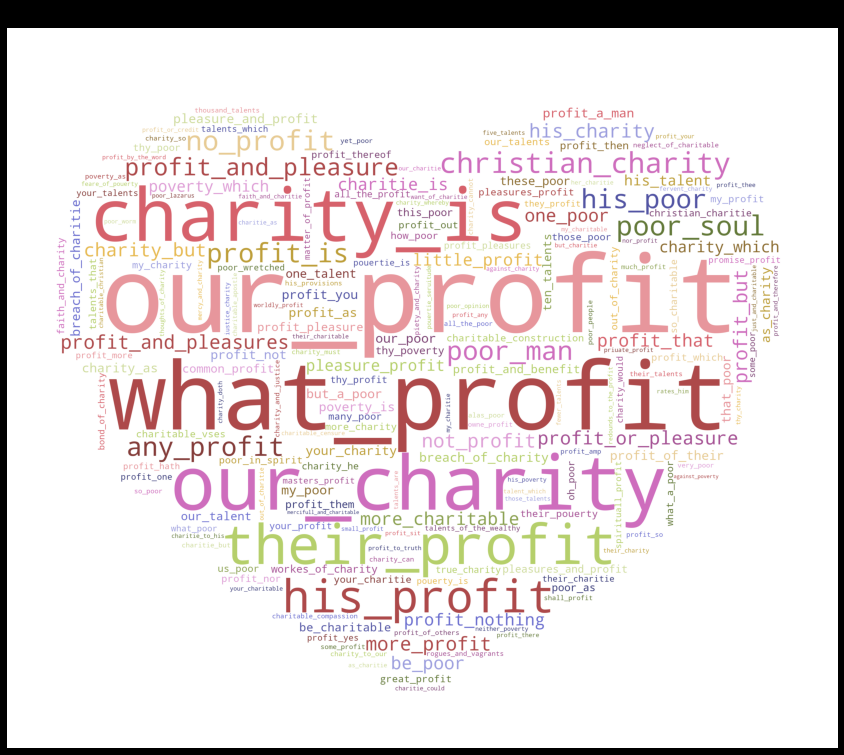

In [75]:
charitygrams = getgrams('gramsEachcharityText.txt')
counts = Counter(charitygrams)
print(counts.most_common(n=25))
wordcloud(counts,"Key N-grams in Charity Texts",maskable_image,'tab20b')

[('what_profit', 8), ('it_profit', 7), ('iudgement_of_charitie', 7), ('pleasures_and_profit', 6), ('profit_but', 6), ('hope_and_charitie', 5), ('workes_of_charitie', 5), ('profit_and_pleasure', 5), ('their_profit', 5), ('law_of_charitie', 5), ('vowed_pouertie', 4), ('christian_charitie', 4), ('loue_and_charitie', 4), ('charitie_is', 4), ('pouertie_might', 4), ('pouertie_as', 4), ('pouertie_and_want', 4), ('profit_and_pleasures', 4), ('profit_little', 4), ('extreame_pouertie', 4), ('honours_profit', 4), ('little_profit', 4), ('profit_thereby', 4), ('epistle_charitie', 3), ('profit_neuer', 3)]


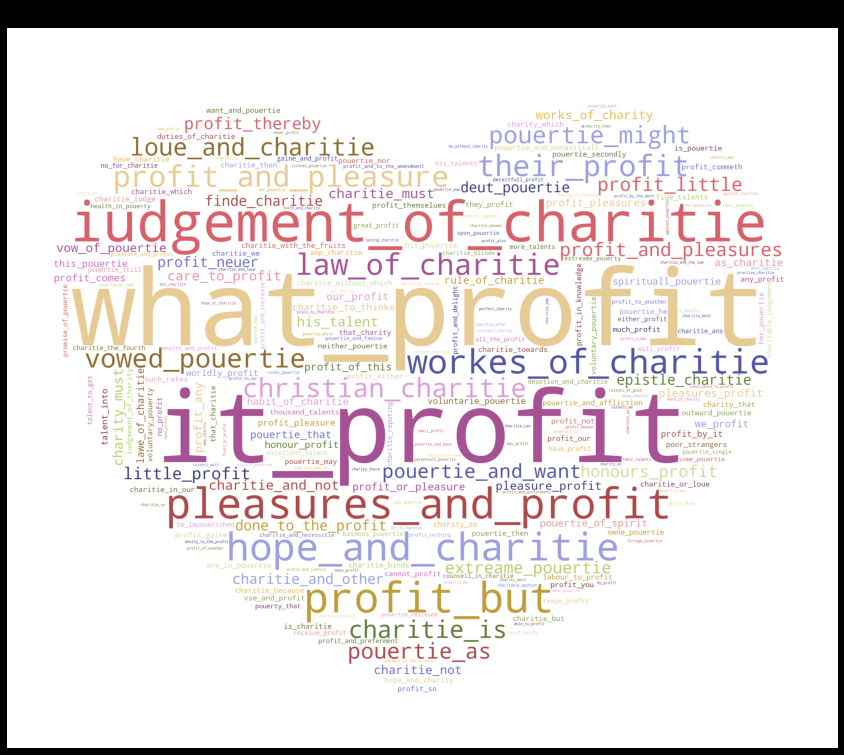

In [69]:
charitygrams = getgrams('gramsEachPerkinsText.txt')
counts = Counter(charitygrams)
print(counts.most_common(n=25))
wordcloud(counts,"Key N-grams in Perkins' Texts",maskable_image,'tab20b')


In [13]:
bigramdata = getTexts('/Users/amycweng/Digital Humanities/charityTXT')
bigramtexts = list(bigramdata.values())
bigramnames = list(bigramdata.keys())
print(len(bigramnames))

199


In [14]:
''' 
Gets bigrams and trigrams that appear at least TWICE

https://radimrehurek.com/gensim_3.8.3/models/phrases.html 
'''
training = []
for t in bigramtexts:
    words = t.split(' ')
    training.append(words)

bigrammodel = Phrases(training, min_count=2, threshold= 0, scoring='npmi', connector_words=phrases.ENGLISH_CONNECTOR_WORDS)
print('bigram model trained')
trigrammodel = Phrases(bigrammodel[training], min_count=2, threshold= 0, scoring='npmi', connector_words=phrases.ENGLISH_CONNECTOR_WORDS)
print('trigram model trained')

bigram model trained
trigram model trained


In [16]:
searchwords = ['charity', 'charitie','charities','charitable','alms','almsgiving',
                'bequest','bequests','alm','provisions','poor','poverty','impouerished',
                'pouerty','pouertie','povertie','rates','rating','vagrant','vagrancy',
                'vagrants','caritas','profit','profits','talents','talent']
gramDict = {}
gramFreqs = {}
for key in searchwords: 
    gramDict[key] = []
    gramFreqs[key] = 0
    
name = 'charity'
storeGramFile = open(f'gramsEach{name}Text.txt','w')
count = 0
for idx, text in enumerate(bigramtexts):
    #for outputting to txt file, specify here
    textGrams = []
    text = text.strip().split(' ')
    bgcount = Counter(b for b in bigrammodel[text] if len(b.split("_")) > 1)
    tgcount = Counter(t for t in trigrammodel[text] if len(t.split("_")) > 2)
    for gram,freq in dict(bgcount).items():
        for s in searchwords: 
            if s in gram.split('_'):
                gramDict[s].append(gram)
                gramFreqs[s] += freq
                textGrams.append(gram)

    storeGramFile.write(f'{bigramnames[idx]}: {" ".join(textGrams)}\n')
    count += 1
    if count%20 == 0:
        print(count, "files processed")
storeGramFile.close()
with open(f'{name}Grams.txt', 'w+') as outfile: 
    for s in searchwords: 
        outfile.write(f"{s}: {gramFreqs[s]} occurrences\n\t\t{' '.join(gramDict[s])}\n")

print('processing complete')

20 files processed
40 files processed
60 files processed
80 files processed
100 files processed
120 files processed
140 files processed
160 files processed
180 files processed
processing complete
